**`=> importing the necessary libraries`**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**`=> data collection and processing`**

In [10]:
df= pd.read_csv("gld_price_data.csv")

In [12]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
df.shape

(2290, 6)

In [20]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**`=> correlation`**

In [29]:
df= df.drop(["Date"], axis= 1)

In [31]:
correlation= df.corr()

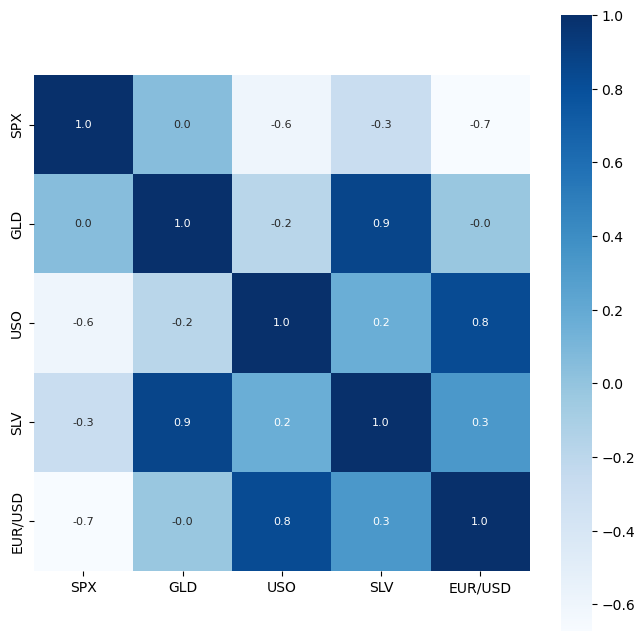

In [45]:
# construct heatmap for understand correlation
plt.figure(figsize= (8, 8))
sns.heatmap(correlation, cbar= True, fmt= ".1f", square= True, annot= True, annot_kws= {"size": 8}, cmap="Blues")
plt.show()

In [47]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\uttam\AppData\Local\Temp\ipykernel_10852\3509941495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"], color= "Green")


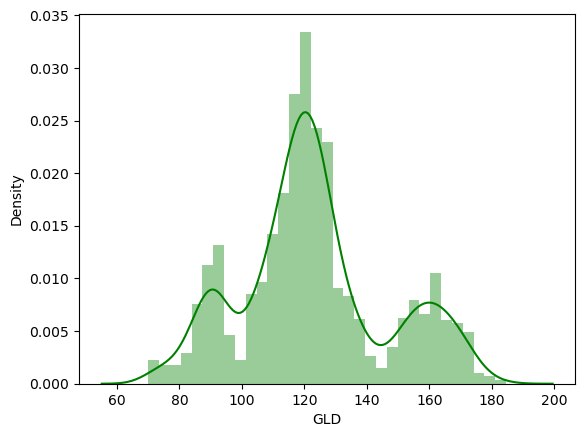

In [51]:
sns.distplot(df["GLD"], color= "Green")
plt.show()

**`=> splitting the variable and target`**

In [54]:
X= df.drop(["GLD"], axis= 1)
Y= df["GLD"]

In [56]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [58]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**`=> splitting the data train and test`**

In [63]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 42, test_size= 0.2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


**`=> train the model`**

In [71]:
rf= RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [77]:
# prediction on train data
train_pred= rf.predict(X_train)

# r2 score error on train data
train_error= metrics.r2_score(Y_train, train_pred)
print(train_error)

0.9985721453392647


In [79]:
# prediction on test data
test_pred= rf.predict(X_test)

# r2 score error on train data
test_error= metrics.r2_score(Y_test, test_pred)
print(test_error)

0.99005610088459


In [83]:
Y_train= list(Y_train)

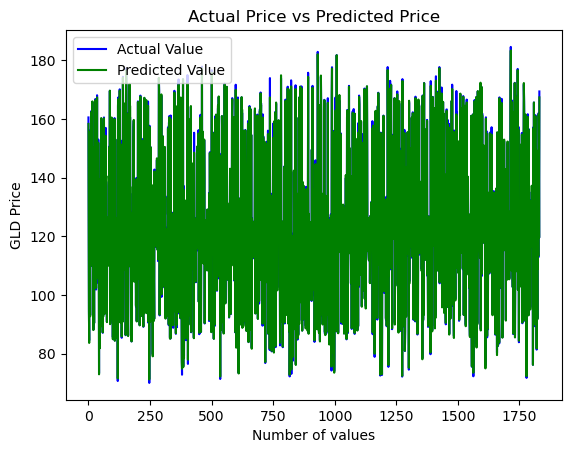

In [85]:
plt.plot(Y_train, color= "Blue", label= "Actual Value")
plt.plot(train_pred, color= "Green", label= "Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [89]:
Y_test= list(Y_test)

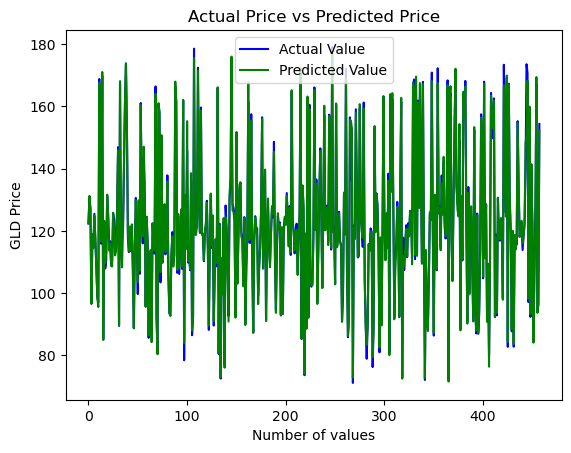

In [95]:
plt.plot(Y_test, color= "Blue", label= "Actual Value")
plt.plot(test_pred, color= "Green", label= "Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()